In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
passengers_train = pd.read_csv("train.csv")
passengers_test = pd.read_csv("test.csv")

In [3]:
passengers_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
passengers_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
passengers_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
passengers_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
passengers_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
passengers_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


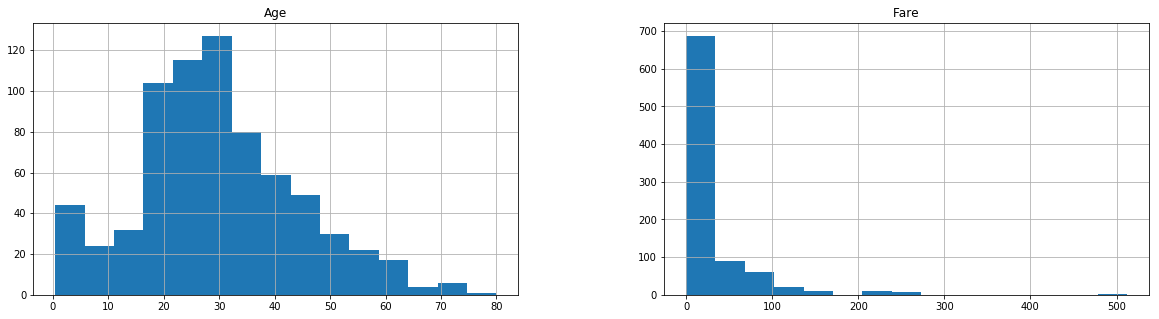

In [9]:
passengers_train[["Age", "Fare"]].hist(bins=15, figsize=(20, 5))
plt.show()

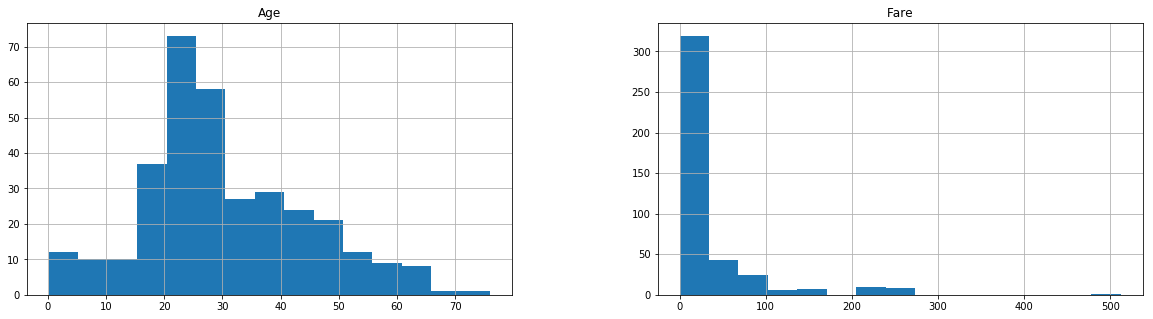

In [10]:
passengers_test[["Age", "Fare"]].hist(bins=15, figsize=(20, 5))
plt.show()

In [11]:
passengers_test["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [12]:
passengers_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
def process_name(name):
    second, first = name.split(",")
    last_name = second.strip()
    first_name_tokens = first.split(".")
    title = first_name_tokens[0]
    first_name = " ".join(first_name_tokens[1:])
    return [last_name, title, first_name]

names = np.array(list(map(lambda x: process_name(x), passengers_train['Name'])))
augmented_passengers_train = pd.concat([passengers_train, 
                                        pd.DataFrame(names, columns=["LastName", "Title", "FirstName"])], axis=1)

augmented_passengers_train = pd.concat([augmented_passengers_train, 
                                        pd.DataFrame(augmented_passengers_train['Parch'] + augmented_passengers_train['SibSp'], columns=["FamilySize"])], axis=1)

# pd.DataFrame(augmented_passengers_train['Parch'] + augmented_passengers_train['SibSp'], columns=["FamilySize"])


In [14]:
survivors = augmented_passengers_train[augmented_passengers_train["Survived"] == 1]
non_survivors = augmented_passengers_train[augmented_passengers_train["Survived"] == 0]

In [15]:
def plot_categorical_survival(colname, figsize=(20, 5)):
    fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, figsize=figsize)
    non_survivors[colname].value_counts().plot(ax=ax, kind="barh", title="Non-Survivors")
    survivors[colname].value_counts().plot(ax=ax2, kind="barh", title="Survivors")
    
def plot_numerical_survival(colname, figsize=(20, 5)):
    fig, (ax, ax2) = plt.subplots(ncols=2, nrows=1, figsize=figsize)
    non_survivors[colname].plot(kind='hist',ax=ax)
    survivors[colname].plot(kind='hist', ax=ax2)
    ax.set_title("Non-Survivors")
    ax2.set_title("Survivors")

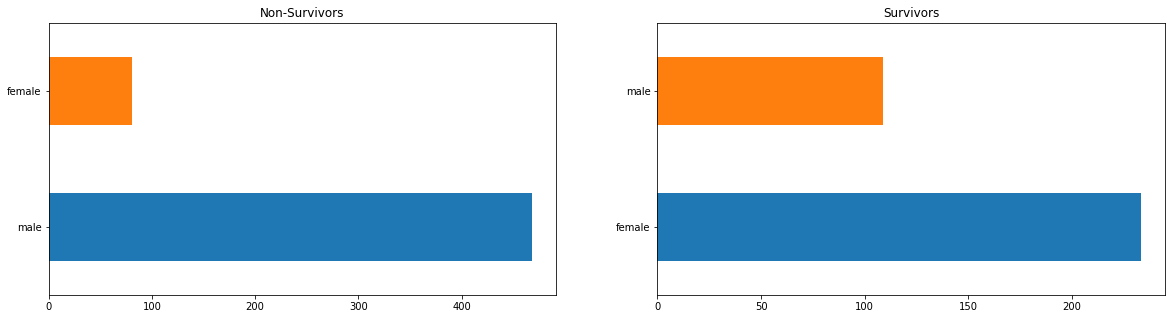

In [16]:
plot_categorical_survival("Sex")

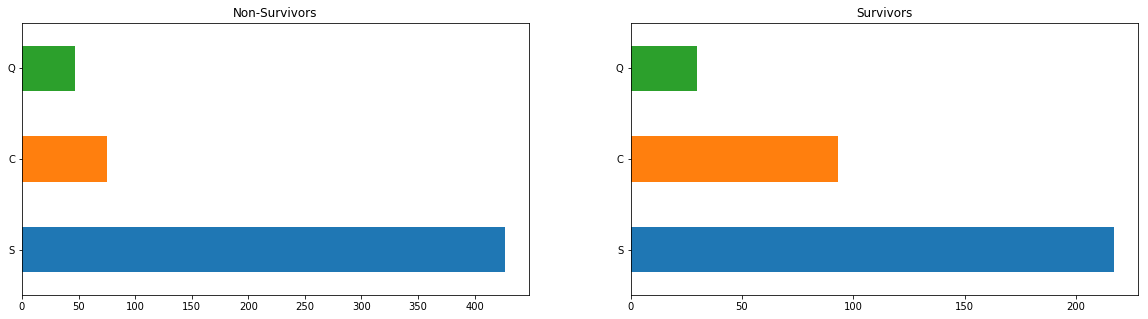

In [17]:
plot_categorical_survival("Embarked")

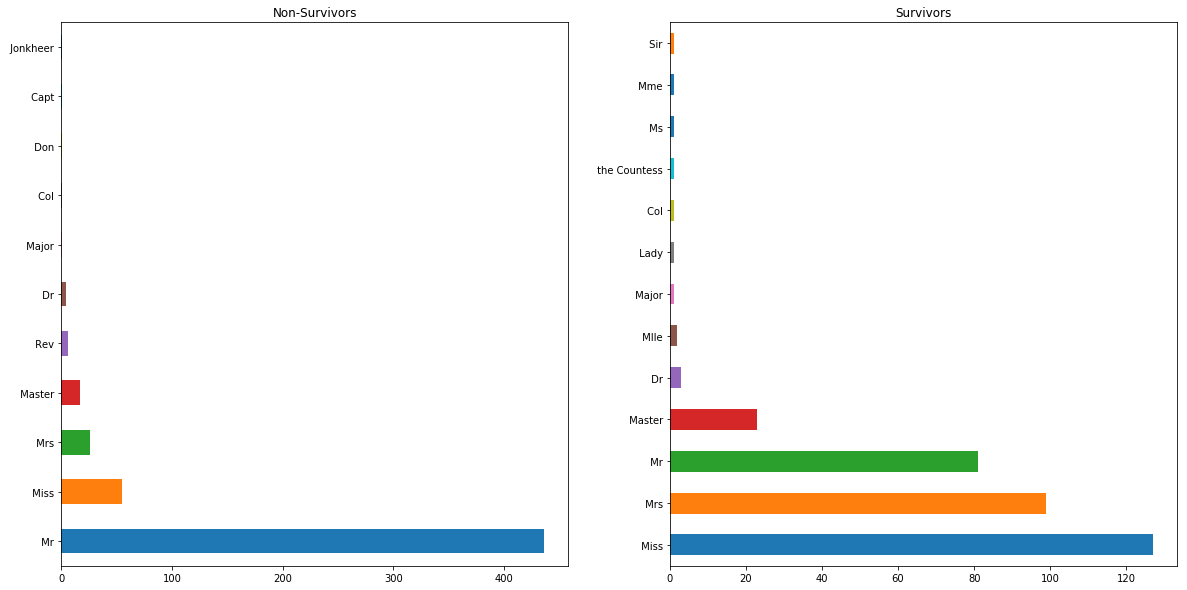

In [18]:
plot_categorical_survival("Title", figsize=(20, 10))

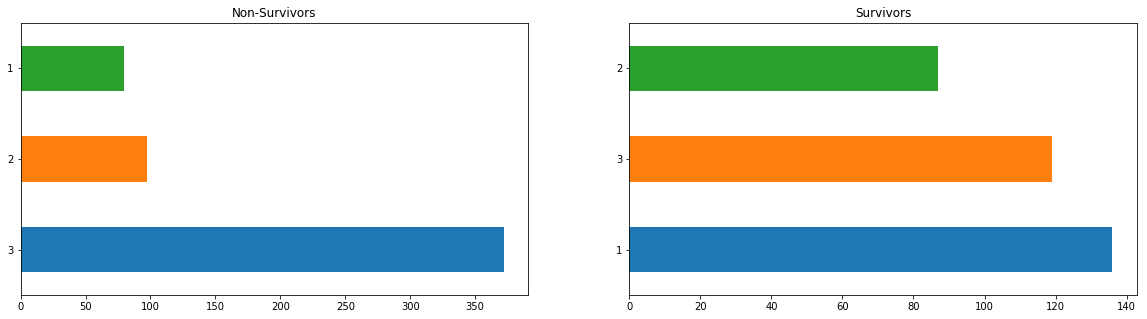

In [19]:
plot_categorical_survival("Pclass")

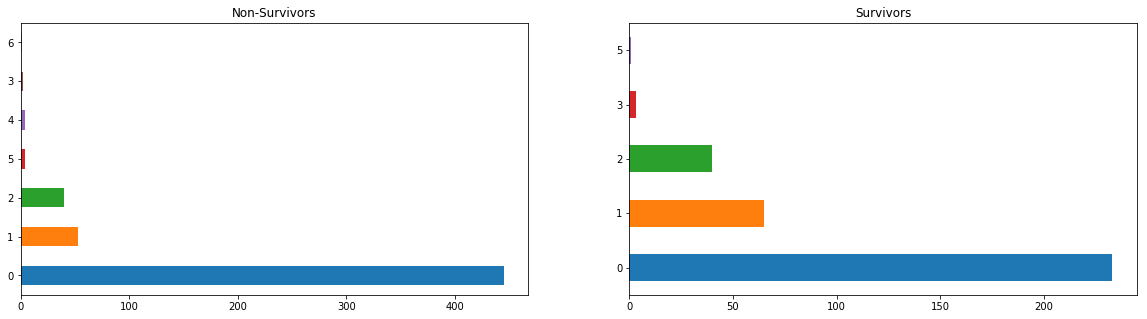

In [20]:
plot_categorical_survival("Parch")

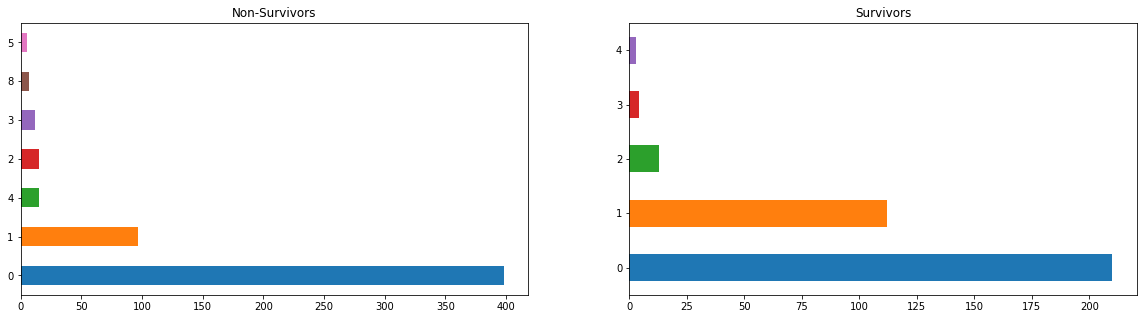

In [21]:
plot_categorical_survival("SibSp")

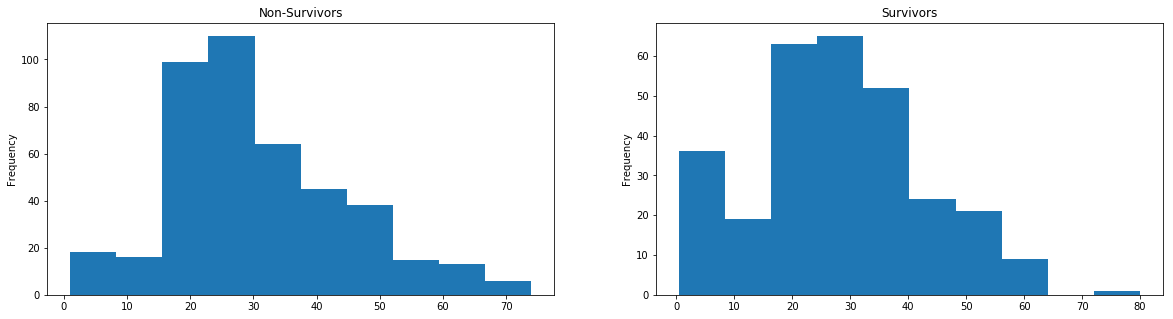

In [22]:
plot_numerical_survival("Age")

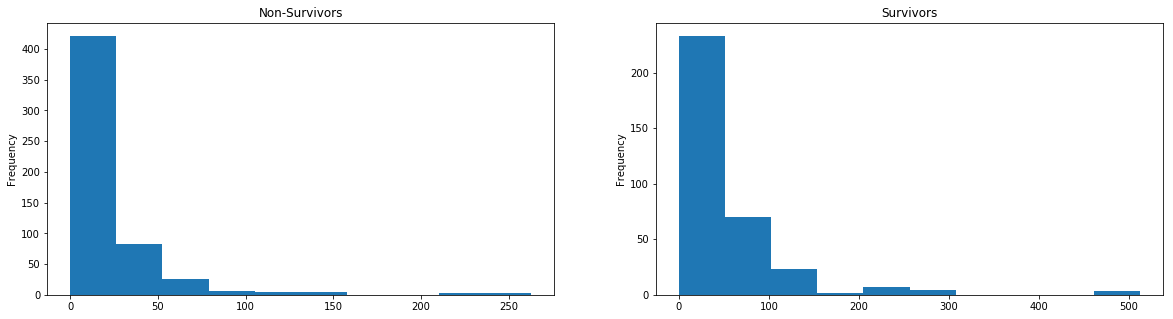

In [23]:
plot_numerical_survival("Fare")

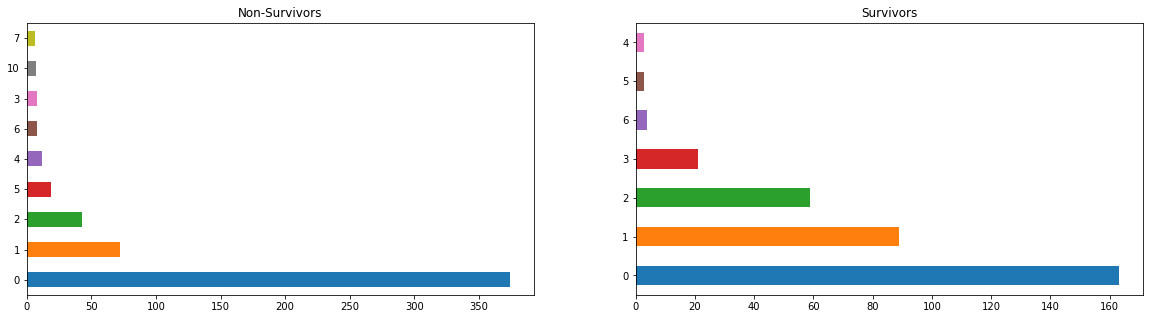

In [24]:
plot_categorical_survival("FamilySize")

In [25]:
# augmented_passengers_train['Embarked'].fillna(method="backfill").value_counts()
augmented_passengers_train['Embarked'].value_counts()
# augmented_passengers_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, Imputer
from future_encoders import OrdinalEncoder

class NameTransfomer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return pd.concat([X, pd.DataFrame(
            np.array(list(map(lambda x: process_name(x), X['Name']))), columns=["LastName", "Title", "FirstName"])], axis=1)

class FamilySizeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return pd.concat([X,  pd.DataFrame(X['Parch'] + X['SibSp'], columns=["FamilySize"])], axis=1)
    
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names]

class CategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.fillna(method="backfill")
    
category_attributes = ['Pclass', "Sex", "Embarked", "Title"]
category_pipeline = Pipeline([
    ('name_transformer', NameTransfomer()),
    ("selector", DataFrameSelector(category_attributes)),
    ("imputer", CategoricalImputer()),
    ("label_encoder", OrdinalEncoder())
])

numerical_attributes = ['Age', 'Fare', "FamilySize"]
numerical_pipeline = Pipeline([
    ("family_size_transformer", FamilySizeTransformer()),
    ("selector", DataFrameSelector(numerical_attributes)),
    ("imputer", Imputer(strategy="median")),
#     ("std_scaler", StandardScaler())
])

full_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("category_pipeline", category_pipeline),
])

In [27]:
category_pipeline.fit_transform(passengers_train)

array([[ 2.,  1.,  2., 11.],
       [ 0.,  0.,  0., 12.],
       [ 2.,  0.,  2.,  8.],
       ...,
       [ 2.,  0.,  2.,  8.],
       [ 0.,  1.,  0., 11.],
       [ 2.,  1.,  1., 11.]])

In [28]:
numerical_pipeline.fit_transform(passengers_train)

array([[22.    ,  7.25  ,  1.    ],
       [38.    , 71.2833,  1.    ],
       [26.    ,  7.925 ,  0.    ],
       ...,
       [28.    , 23.45  ,  3.    ],
       [26.    , 30.    ,  0.    ],
       [32.    ,  7.75  ,  0.    ]])

In [29]:
passenger_train_prepared = full_pipeline.fit_transform(passengers_train)
passenger_train_labels = np.array(passengers_train['Survived'])

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=256, max_leaf_nodes=32, max_depth=32)
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, passenger_train_prepared, passenger_train_labels, cv=20))

0.8372782169521301

In [54]:
clf.fit(passenger_train_prepared, passenger_train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=32,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=256, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
clf.feature_importances_

array([0.10835795, 0.16089279, 0.08296887, 0.12093088, 0.32135238,
       0.02761454, 0.17788259])

In [56]:
passenger_test_prepared = full_pipeline.fit_transform(passengers_test)
test_predicted = clf.predict(passenger_test_prepared)

In [57]:
final_answer = pd.DataFrame(np.c_[passengers_test['PassengerId'], test_predicted], columns=["PassengerId", "Survived"])

In [58]:
final_answer.to_csv("submission.csv",index=False)